In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In this notebook I will be analyzing insta card 2017 data. This data has a list of departments named department, order hour of the day starting at 0 and ending at 23 0 being 12am  caled order_hour_of_day. This data also has the number of orders each hour called num_orders_hour as well as the total orders for each department called tot_orders_dept. 

Stanley, J. (2017, May 4). 3 million Instacart orders, open sourced. Medium. Retrieved February 23, 2023, from https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2 

Below I am reading the cvs file and creating a data frame. I also print the top of the data frame so that I know what the data consist of.

In [3]:

insta_cart_df = pd.read_csv('InstacartOrdersByDepartment.csv')
insta_cart_df.head()


,order_hour_of_day,department,num_orders_hour,tot_orders_dept
0,0,alcohol,33.0,5598.0
1,1,alcohol,32.0,5598.0
2,2,alcohol,5.0,5598.0
3,3,alcohol,3.0,5598.0
4,4,alcohol,2.0,5598.0


In [4]:
#Below I print the tail of the data just to make sure the data is the same from top to bottom.
insta_cart_df.tail()

,order_hour_of_day,department,num_orders_hour,tot_orders_dept
499,19,snacks,4959.0,118862.0
500,20,snacks,3397.0,118862.0
501,21,snacks,2782.0,118862.0
502,22,snacks,2216.0,118862.0
503,23,snacks,1322.0,118862.0


# Research Question to be answered "Do people order different foods at different times of the day?"

### Products bought by time of day.


Took me a while to be able to answer this question at first I tried group by but all the information was in long format instead of horizontal so I started over and decided to pivot th data. I made the columns order_hour_of_the_day so that it is easier to see how much was purchased at each hour

In [5]:
products_by_time_df =insta_cart_df.pivot(index = "order_hour_of_day", columns = "department", values = "num_orders_hour")

In [6]:
products_by_time_df.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
order_hour_of_day,,,,,,,,,,,,,,,,,,,,,
0,33.0,70.0,307.0,694.0,175.0,12.0,324.0,1331.0,290.0,251.0,...,239.0,76.0,188.0,67.0,14.0,565.0,157.0,57.0,2782.0,759.0
1,32.0,70.0,175.0,473.0,124.0,13.0,150.0,827.0,197.0,157.0,...,134.0,50.0,120.0,40.0,10.0,350.0,101.0,18.0,1697.0,455.0
2,5.0,49.0,103.0,285.0,60.0,3.0,99.0,456.0,104.0,87.0,...,91.0,25.0,77.0,13.0,6.0,201.0,60.0,8.0,985.0,244.0
3,3.0,25.0,75.0,247.0,54.0,1.0,100.0,391.0,80.0,60.0,...,59.0,32.0,40.0,15.0,2.0,136.0,37.0,6.0,682.0,203.0
4,2.0,22.0,86.0,231.0,62.0,0.0,96.0,383.0,62.0,74.0,...,113.0,27.0,50.0,13.0,3.0,140.0,38.0,20.0,622.0,194.0


In [7]:
alcohol = products_by_time_df['alcohol']
babies = products_by_time_df['babies']
bakery= products_by_time_df['bakery']
beverages = products_by_time_df['beverages']
bulk = products_by_time_df['bulk']
canned_goods = products_by_time_df['canned goods']
dairy_eggs = products_by_time_df['dairy eggs']
deli = products_by_time_df['deli']



### Legend with intelligible labels (if legend is needed) and Intelligible axis labels (& tick marks).


Below I decided to make a regular bar graph and I made the graph stacked due to the fact that when the graph was unstack the information was all on top of one another and very hard to read. I decided to make the x lable hour because it would allow you to clearly see what hour had the most sales in that case the hour was 14 and produce sold the most items and other in that hour sold the second most. This would make sense to a layperson because if they were trying to figure out what hours in their store do they have the least sales in that case it would have been between 3am and 4am. 

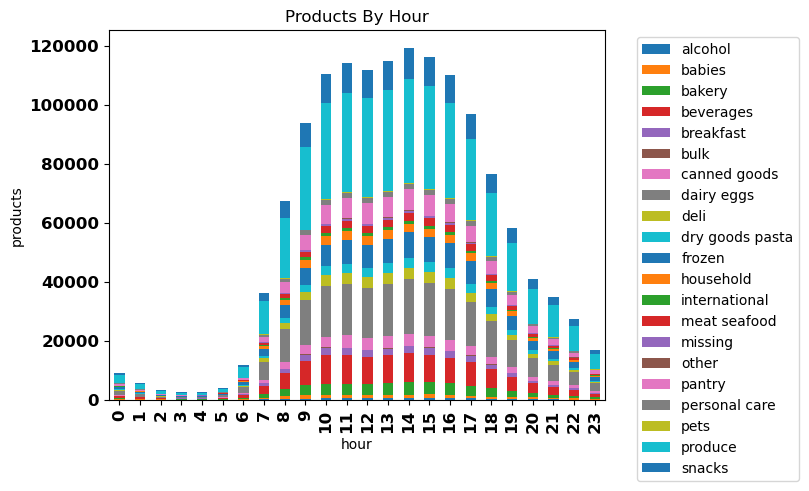

In [8]:
products_by_time_df.plot(kind= 'bar', stacked =True) 
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel ('hour')
plt.ylabel('products')
plt.title( 'Products By Hour')
plt.xticks(fontsize = 12, fontweight = 'bold')
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.show()

Next I decided to try and graph each department seperatley and that woukd make sense to a layperson if they wanted to visually see in what hour does each department do better in or least best in a great example would be below babies tend to sale most items at 10am and the least items at 12am. 

Since there was so much data and it was hard to read it on one plot I tried to graph each department seperately using a facet grid and I don't have much experience with this so it was a little difficult to complete and to fully understand but I feel as though this was a better decision then my graph up top because it is way easier to read and just by looking at the individual plots I can tell that produce sales the most items in a day and the most items per hour during most of the hours.

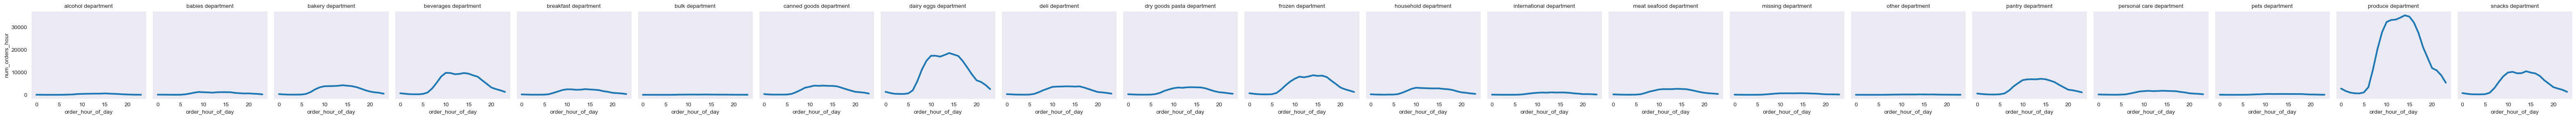

In [12]:

sns.set_style('dark')
grapher = sns.FacetGrid(insta_cart_df,col = 'department');
grapher.map_dataframe(sns.lineplot,x= 'order_hour_of_day', y = 'num_orders_hour', lw = 3);
grapher.set_titles(col_template = '{col_name} department');

In conclusion from sorting and creating my visualizations in terms of the research question which was "Do people order different foods at different times of the day?" the answer would be yes people do order different items during different times of the day I can tell that breakfast does very well between 8am and 10 am but after 10am breakfast has a large decrease. I can also tell that between the hours of 12am to 10am produce is steadily increasing with sales but once 10am ends produce sales start to decrease. Overall people do tend to buy different items during different hours of the day.

As for limitations with the analayses lack of knowing how to perfectly size and make graphs makes it a little hard to understand the graphs. If my group by function would have work it might have looked nicer because I tried grouping the hours of the day together to plot moring, afternoon and evening graphs based off of time but I had difficulties knowing how to do it.